# Data Analysis

In [1]:
 #%%
from globals import *
%matplotlib inline

In [2]:
data_dir = '../data/data.json'
with open(data_dir) as json_file:
    days_dict = json.load(json_file)
    all_daytimes = list(days_dict.keys())

In [3]:

all_assets = list(days_dict[all_daytimes[0]].keys())
print(f'all assets: {all_assets}, length: {len(all_assets)}')

all assets: ['SPY', 'TLT', 'AAPL', 'AMZN', 'DIA', 'FB', 'GLD', 'GOOG', 'GOOGL', 'GOVT', 'IAU', 'IEF', 'IGSB', 'IVV', 'LQD', 'MSFT', 'NFLX', 'QQQ', 'SHY', 'TSLA', 'VCIT', 'VCSH', 'VIXY', 'VOO'], length: 24



## stocks, corp_bonds, gov_bonds, commodities

In [29]:
# stocks, corp_bonds, gov_bonds, commodities
stocks = ['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'FB', 'NFLX', 'TSLA']
stock_etfs = ['SPY', 'VIXY', 'IVV', 'VOO', 'QQQ', 'DIA']
corp_bonds = ['VCSH', 'IGSB', 'VCIT', 'LQD']
gov_bonds = ['SHY', 'IEF', 'GOVT', 'TLT']
commodities = ['IAU', 'GLD']
print(f'all assets: {len(stocks) + len(corp_bonds) + len(gov_bonds) + len(commodities)}')

all assets: 18


In [30]:
all_daytimes[:3]

['2021-04-12', '2021-04-13', '2021-04-14']

In [31]:
all_daytimes.sort(key=lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [32]:
all_daytimes[:3]

['2021-04-12', '2021-04-13', '2021-04-14']

In [33]:
all_daytimes[-3:]

['2022-01-12', '2022-01-13', '2022-01-14']

In [34]:
def assets_plot(curr_ax, curr_assets):
    prices = {asset: [] for asset in curr_assets}
    volumes = {asset: [] for asset in curr_assets}
    for asset in curr_assets:
        for day in all_daytimes:
            day_data = days_dict[day]
            prices[asset].extend(day_data[asset]['price'])
            volumes[asset].extend(day_data[asset]['volume'])
        list_np = np.array(prices[asset])
        curr_ax.plot(list_np - list_np[0], label=asset)
        # plt.plot(volumes[asset])
        curr_ax.legend()

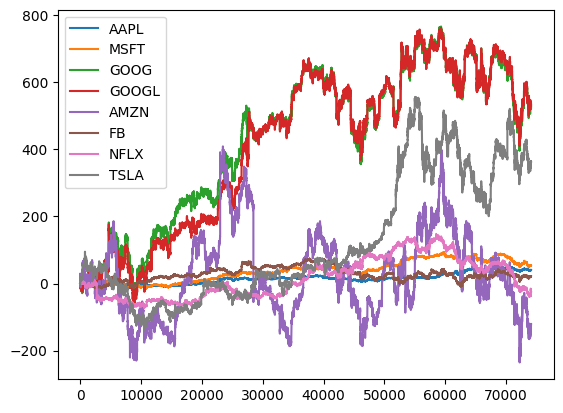

In [36]:
fig, ax = plt.subplots()
assets_plot(ax, stocks)
# assets_plot(ax, corp_bonds)
# assets_plot(ax, gov_bonds)
# assets_plot(ax, commodities)

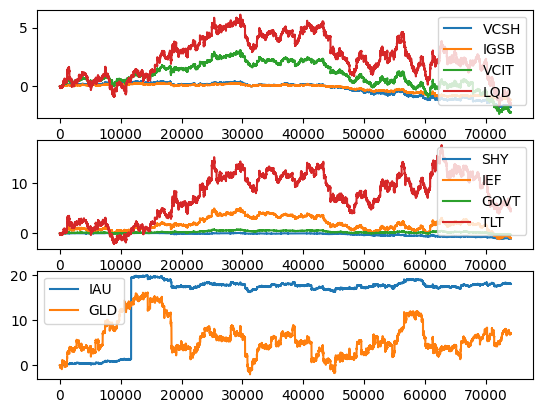

In [77]:
fig, ax = plt.subplots(3, 1)
# assets_plot(ax[0], stocks)
assets_plot(ax[0], corp_bonds)
assets_plot(ax[1], gov_bonds)
assets_plot(ax[2], commodities)
plt.show()

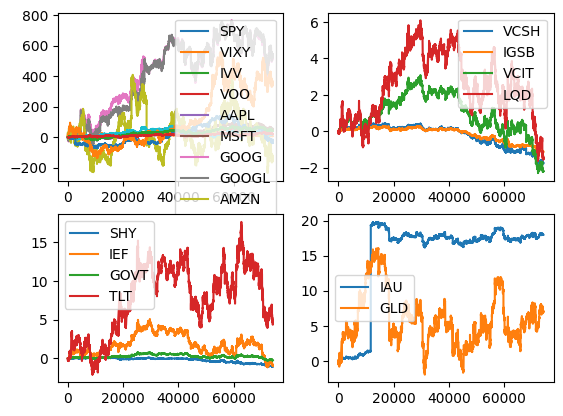

In [68]:
# stocks, corp_bonds, gov_bonds, commodities
# assets = stocks
# assets = corp_bonds
# assets = gov_bonds
# assets = commodities

fig, ax = plt.subplots(2, 2)
assets_plot(ax[0, 0], stocks)
assets_plot(ax[0, 1], corp_bonds)
assets_plot(ax[1, 0], gov_bonds)
assets_plot(ax[1, 1], commodities)
plt.show()

## Corp Bonds

In [20]:
# H1: VCSH - SHY = SPY
def get_full_data(curr_asset, curr_days=all_daytimes):
    full_price_data = []
    full_volume_data = []
    for day in curr_days:
        day_data = days_dict[day]
        full_price_data.extend(day_data[curr_asset]['price'])
        full_volume_data.extend(day_data[curr_asset]['volume'])
    full_price_data = np.array(full_price_data)
    full_volume_data = np.array(full_volume_data)
    return full_price_data, full_volume_data


In [21]:
vcsh_data, _ = get_full_data('VCSH')
shy_data, _ = get_full_data('SHY')
spy_data, _ = get_full_data('SPY')

vcsh_data -= vcsh_data[0]
shy_data -= shy_data[0]
spy_data -= spy_data[0]

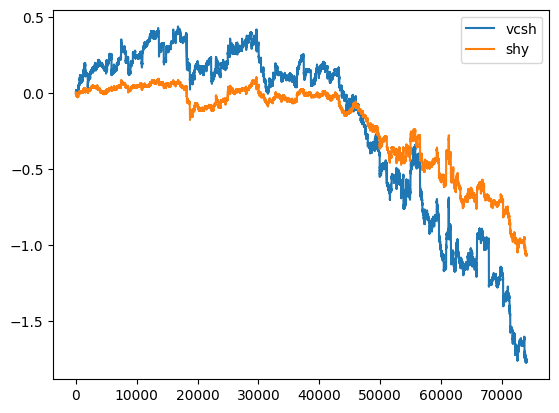

In [22]:
plt.plot(vcsh_data, label='vcsh')
plt.plot(shy_data, label='shy')
# plt.plot(spy_data, label='spy')
plt.legend()
plt.show()

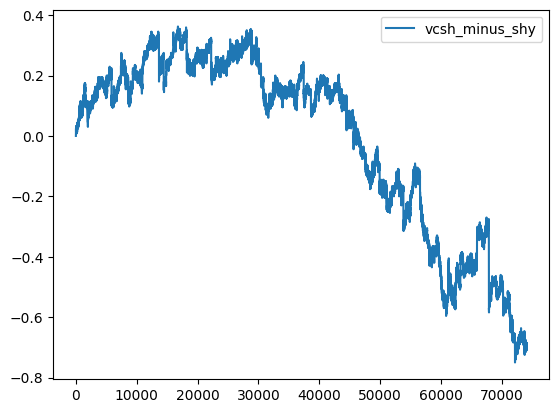

In [24]:

# vcsh_minus_shy = shy_data - vcsh_data
vcsh_minus_shy = vcsh_data - shy_data

plt.plot(vcsh_minus_shy, label='vcsh_minus_shy')
# plt.plot(spy_data, label='spy')
plt.legend()
plt.show()

## Volume

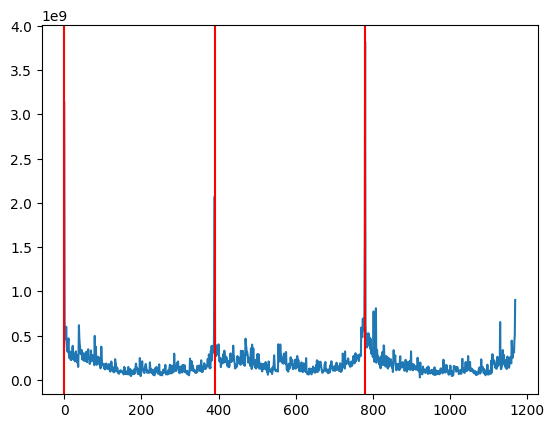

In [38]:
curr_days = all_daytimes[-3:]
all_volumes = np.zeros(len(get_full_data('SPY', curr_days)[0]))
# for asset in all_assets:
for asset in stocks:
    asset_prices, asset_volumes = get_full_data(asset, curr_days)
    all_volumes += asset_volumes * asset_prices

plt.plot(all_volumes)
for i in range(len(all_volumes)):
    if i % 390 == 0:
        plt.axvline(x = i, color = 'r')
plt.show()

In [44]:
all_daytimes[-3:]

['2022-01-12', '2022-01-13', '2022-01-14']

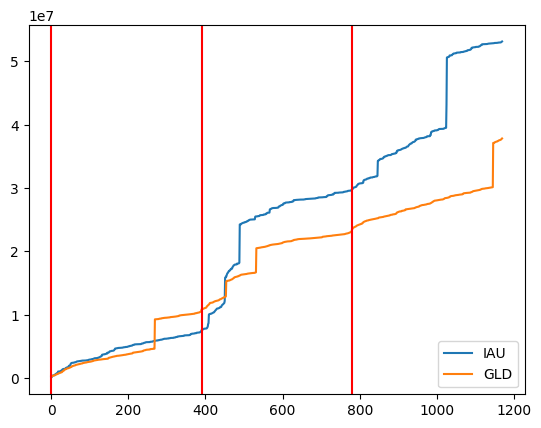

In [45]:
curr_days = all_daytimes[-3:]
data_length = len(get_full_data('SPY', curr_days)[0])
all_volumes = {asset: np.zeros(data_length) for asset in all_assets}
# for asset in stocks:
# for asset in stock_etfs:
# for asset in corp_bonds:
# for asset in gov_bonds:
for asset in commodities:
    asset_prices, asset_volumes = get_full_data(asset, curr_days)
    all_volumes[asset] += asset_volumes
    plt.plot(np.cumsum(all_volumes[asset]), label=f'{asset}')

for i in range(data_length):
    if i % 390 == 0:
        plt.axvline(x = i, color = 'r')
plt.legend()
plt.show()

## Stocks * Volume

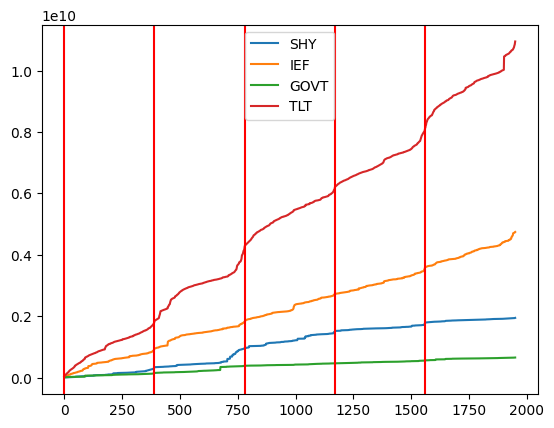

In [125]:
curr_days = all_daytimes[-5:]
data_length = len(get_full_data('SPY', curr_days)[0])
all_volumes = {asset: np.zeros(data_length) for asset in all_assets}
# for asset in stocks:
# for asset in corp_bonds:
for asset in gov_bonds:
# for asset in commodities:
    asset_prices, asset_volumes = get_full_data(asset, curr_days)
    all_volumes[asset] += asset_prices * asset_volumes
    # plt.plot(all_volumes[asset], label=f'{asset}')
    plt.plot(np.cumsum(all_volumes[asset]), label=f'{asset}')

for i in range(data_length):
    if i % 390 == 0:
        plt.axvline(x=i, color='r')
plt.legend()
plt.show()